A Sample graph

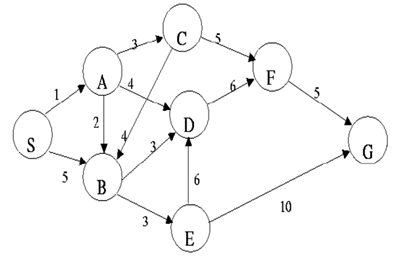

**Storing the Graph in a suitable Python data structure**

In [3]:
graph1 = {'S':{'A':1,'B':5},
            'A':{'B':2,'C':3,'D':4},
            'B':{'D':3,'E':3},
            'C':{'B':4,'F':5},
            'D':{'F':6},
            'E':{'D':6,'G':10},
            'F':{'G':5},
            'G':{}
            }

# Implementation of Breadth First Search (BFS)

<p style="text-align: justify"> <b>Generated</b> is a set of states which has been generated, because once we’ve reached a state, we can never find a better path to the state. That also means we can do an <b>early goal test</b>, checking whether a node is a solution as soon as it is generated, rather than the late goal test that best-first search uses, waiting until a node is popped off (selected for expansion) the queue.</p>
<b>Expanded</b> is a set of states which has been <b>selected</b> from the <b>generated</b> list and then expanded.

In [4]:
def bfs(start, goal, G):
    # by default the expanded list is empty
    expanded= []
    # we don't store only node names rather the paths to the nodes and path costs are also stored
    queue = [[start]]

    # repeat untill the goal test satisfied or the queue becomes empty
    while len(queue) > 0:
        print(f'Queue:',end='')
        for path in queue[:-1]:
          print('-'.join(path), end = ',')
        print('-'.join(queue[-1]))
        # selceting the node
        upath  = queue.pop(0)
        u = upath[-1]

        print(f'{"-".join(upath)} is selected.')
        # do not expand if already in the expanded list
        if u in expanded:
          continue

        expanded.append(u)
        print(f'Expanded list:{",".join(expanded)}')

        for v in G[u].keys(): # ['Sibiu', 'Zerind', 'Timisoara']
            # genereate v if already not in the expanded list
            if v not in expanded:
              vpath = upath + [v]
              # goal test just after a node is generated
              if v == goal:
                print()
                print(f'{goal} is generated and Goal test is satisfied.')
                return vpath # breaking from while

              queue.append(vpath)# store the generated node/path in the frontier
        print()
    print('Failed')

In [9]:
bfs('A', 'G', graph1) # change the soure and destination

Queue:A
A is selected.
Expanded list:A

Queue:A-B,A-C,A-D
A-B is selected.
Expanded list:A,B

Queue:A-C,A-D,A-B-D,A-B-E
A-C is selected.
Expanded list:A,B,C

Queue:A-D,A-B-D,A-B-E,A-C-F
A-D is selected.
Expanded list:A,B,C,D

Queue:A-B-D,A-B-E,A-C-F,A-D-F
A-B-D is selected.
Queue:A-B-E,A-C-F,A-D-F
A-B-E is selected.
Expanded list:A,B,C,D,E

G is generated and Goal test is satisfied.


['A', 'B', 'E', 'G']

Based on the above BFS simulation, draw the search tree on paper and insert the image in this cell. (Double Click to edit this cell) <br>
**Image size must be 500 pixel (Horizontal)**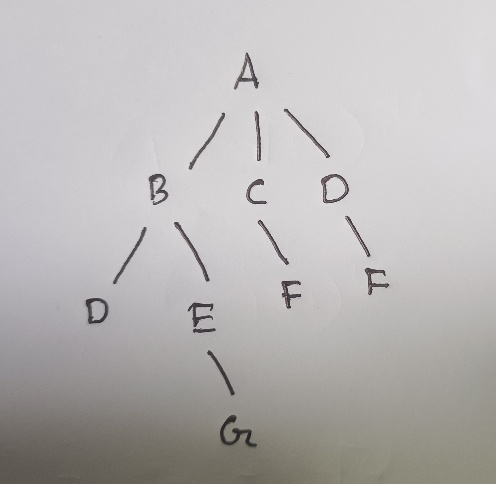

# DFS
Implement DFS using stack,
Implement stack using list (append and pop)

In [13]:
# modify the code of BFS to inplement DFS
# there will be 2 changes:
# 1) instead of queue a stack will be used
# 2) goal test will be performed for selected node before expanding
def dfs(start, goal, G):
    # by default the expanded list is empty
    expanded = []
    # we don't store only node names rather the paths to the nodes and path costs are also stored
    stack = [[start]]

    # repeat until the goal test is satisfied or the stack becomes empty
    while len(stack) > 0:
        print(f'Stack:', end='')
        for path in stack[:-1]:
            print('-'.join(path), end=',')
        print('-'.join(stack[-1]))

        # selecting the node
        upath = stack.pop()  # Change from pop(0) to pop()
        u = upath[-1]

        print(f'{"-".join(upath)} is selected.')

        # do not expand if already in the expanded list
        if u in expanded:
            continue

        expanded.append(u)
        print(f'Expanded list: {",".join(expanded)}')

        for v in G[u].keys():  # ['Sibiu', 'Zerind', 'Timisoara']
            # generate v if already not in the expanded list
            if v not in expanded:
                vpath = upath + [v]
                # goal test just after a node is generated
                if v == goal:
                    print()
                    print(f'{goal} is generated and Goal test is satisfied.')
                    return vpath  # breaking from while

                stack.append(vpath)  # store the generated node/path in the frontier
        print()

    print('Failed')


In [18]:
dfs('A', 'G', graph1) # change the soure and destination

Stack:A
A is selected.
Expanded list: A

Stack:A-B,A-C,A-D
A-D is selected.
Expanded list: A,D

Stack:A-B,A-C,A-D-F
A-D-F is selected.
Expanded list: A,D,F

G is generated and Goal test is satisfied.


['A', 'D', 'F', 'G']

Based on the above DFS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)<br>
**Image size must be 500 pixel (Horizonal)**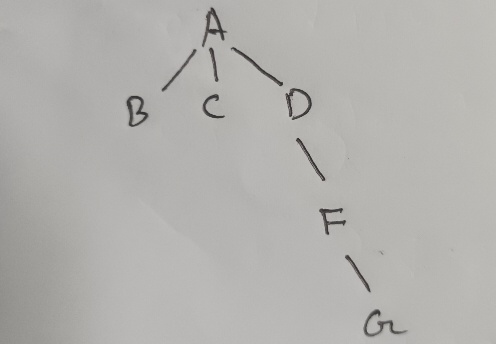

# Another Example

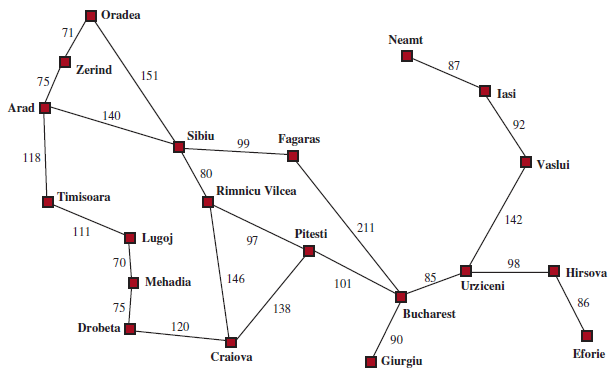

In [20]:
romanian_map = {
    'Arad': { 'Zerind':75, 'Timisoara':118, 'Sibiu':140},
    'Zerind': {'Arad':75, 'Oradea':71},
    'Oradea': {'Zerind':71, 'Sibiu': 151},
    'Sibiu': {'Arad':140, 'Oradea':151, 'Fagaras':99, 'Rimnicu':80},
    'Timisoara': {'Arad': 118, 'Lugoj':111},
    'Lugoj': {'Timisoara':111, 'Mehadia':70},
    'Mehadia': {'Lugoj': 70, 'Drobeta':75},
    'Drobeta': {'Mehadia':75, 'Craiova':120},
    'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
    'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu':99, 'Bucharest':211},
    'Pitesti': {'Rimnicu': 97, 'Craiova':138, 'Bucharest':101},
    'Bucharest': {'Fagaras':211, 'Pitesti': 101, 'Giurgiu':90, 'Urziceni':85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Vaslui':142, 'Hirsova':98},
    'Hirsova': {'Urziceni':98, 'Eforie':86},
    'Eforie': {'Hirsova':86},
    'Vaslui': {'Iasi': 92, 'Urziceni':142},
    'Iasi': {'Vaslui':92, 'Neamt': 87},
    'Neamt': {'Iasi':87}
}

In the above graph the start state is **S**, and the goal state is **G**. The transition costs are next to the edges, and the heuristic estimate, h, of the distance from the state to the goal is in the state’s node.
<br>
Use **BFS** and  **DFS** for this graph.

In [21]:
bfs('Bucharest','Iasi',romanian_map)

Queue:Bucharest
Bucharest is selected.
Expanded list:Bucharest

Queue:Bucharest-Fagaras,Bucharest-Pitesti,Bucharest-Giurgiu,Bucharest-Urziceni
Bucharest-Fagaras is selected.
Expanded list:Bucharest,Fagaras

Queue:Bucharest-Pitesti,Bucharest-Giurgiu,Bucharest-Urziceni,Bucharest-Fagaras-Sibiu
Bucharest-Pitesti is selected.
Expanded list:Bucharest,Fagaras,Pitesti

Queue:Bucharest-Giurgiu,Bucharest-Urziceni,Bucharest-Fagaras-Sibiu,Bucharest-Pitesti-Rimnicu,Bucharest-Pitesti-Craiova
Bucharest-Giurgiu is selected.
Expanded list:Bucharest,Fagaras,Pitesti,Giurgiu

Queue:Bucharest-Urziceni,Bucharest-Fagaras-Sibiu,Bucharest-Pitesti-Rimnicu,Bucharest-Pitesti-Craiova
Bucharest-Urziceni is selected.
Expanded list:Bucharest,Fagaras,Pitesti,Giurgiu,Urziceni

Queue:Bucharest-Fagaras-Sibiu,Bucharest-Pitesti-Rimnicu,Bucharest-Pitesti-Craiova,Bucharest-Urziceni-Vaslui,Bucharest-Urziceni-Hirsova
Bucharest-Fagaras-Sibiu is selected.
Expanded list:Bucharest,Fagaras,Pitesti,Giurgiu,Urziceni,Sibiu

Queue:Buch

['Bucharest', 'Urziceni', 'Vaslui', 'Iasi']

Based on the above BFS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)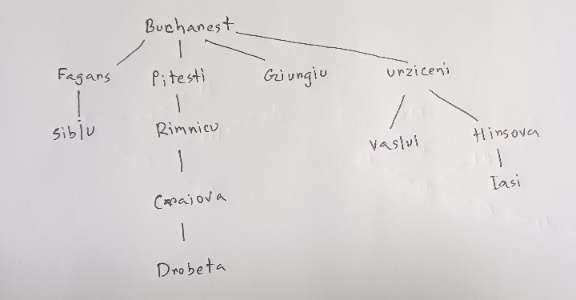

In [23]:
dfs('Bucharest','Iasi',romanian_map)

Stack:Bucharest
Bucharest is selected.
Expanded list: Bucharest

Stack:Bucharest-Fagaras,Bucharest-Pitesti,Bucharest-Giurgiu,Bucharest-Urziceni
Bucharest-Urziceni is selected.
Expanded list: Bucharest,Urziceni

Stack:Bucharest-Fagaras,Bucharest-Pitesti,Bucharest-Giurgiu,Bucharest-Urziceni-Vaslui,Bucharest-Urziceni-Hirsova
Bucharest-Urziceni-Hirsova is selected.
Expanded list: Bucharest,Urziceni,Hirsova

Stack:Bucharest-Fagaras,Bucharest-Pitesti,Bucharest-Giurgiu,Bucharest-Urziceni-Vaslui,Bucharest-Urziceni-Hirsova-Eforie
Bucharest-Urziceni-Hirsova-Eforie is selected.
Expanded list: Bucharest,Urziceni,Hirsova,Eforie

Stack:Bucharest-Fagaras,Bucharest-Pitesti,Bucharest-Giurgiu,Bucharest-Urziceni-Vaslui
Bucharest-Urziceni-Vaslui is selected.
Expanded list: Bucharest,Urziceni,Hirsova,Eforie,Vaslui

Iasi is generated and Goal test is satisfied.


['Bucharest', 'Urziceni', 'Vaslui', 'Iasi']

Based on the above DFS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)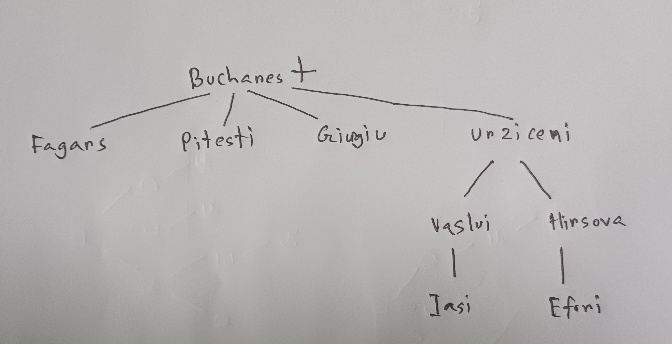

# New Exercise